In [190]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=ba2abd6183711de234702ffbb49ddc6b73db51430850365cec2933a4b461bb0d
  Stored in directory: c:\users\el_ra\appdata\local\pip\cache\wheels\06\b2\e0\b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


In [191]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
from adjustText import adjust_text

import warnings

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
warnings.filterwarnings('ignore')

### Input Files

In [94]:
df = pd.read_pickle('metadata.pkl')

In [95]:
df.shape #tenemos 321,135 registros de patentes

(321135, 19)

### Clean

In [96]:
df = df.drop(columns=['code', 'inventive', 'first'])

In [97]:
df = df.loc[df.astype(str).drop_duplicates().index]

In [98]:
df = df.set_index('publication_number')

In [99]:
inventors = df[['inventor_list', 'inventor_list_cc']].apply(pd.Series.explode)

In [100]:
assignees = df[['assignee_list', 'assignee_list_cc']].apply(pd.Series.explode)

In [101]:
citations = df[['citations']].explode('citations')
parents = df[['parents', 'parents_dates']].apply(pd.Series.explode)
childs = df[['childs', 'childs_dates']].apply(pd.Series.explode)

In [102]:
colnames = ['country_code', 'title', 'publication_date', 'filing_date', 'grant_date', 'amount_citation']
df = df[colnames].join(inventors).join(assignees).join(parents).join(childs)

In [103]:
df = df.rename(columns={'inventor_list':'inventor', 'inventor_list_cc':'inventor_country',
                      'assignee_list':'assignee', 'assignee_list_cc':'assignee_country',
                      'parents':'parent', 'parents_dates':'parent_date',
                      'childs':'child', 'childs_dates':'child_date'})

In [104]:
df = df.drop_duplicates()

In [105]:
df

,country_code,title,publication_date,filing_date,grant_date,amount_citation,inventor,inventor_country,assignee,assignee_country,parent,parent_date,child,child_date
publication_number,,,,,,,,,,,,,,
US-10000437-B2,US,Nitrogen containing surfactants with alkoxylat...,20180619,20140313,20180619,13,ZHU SHAWN,US,AKZO NOBEL CHEMICALS INT BV,NL,NaN,NaN,NaN,NaN
US-10000437-B2,US,Nitrogen containing surfactants with alkoxylat...,20180619,20140313,20180619,13,SU BIING-MING,US,AKZO NOBEL CHEMICALS INT BV,NL,NaN,NaN,NaN,NaN
US-10000437-B2,US,Nitrogen containing surfactants with alkoxylat...,20180619,20140313,20180619,13,NGUYEN GIAO VINH,US,AKZO NOBEL CHEMICALS INT BV,NL,NaN,NaN,NaN,NaN
US-10000437-B2,US,Nitrogen containing surfactants with alkoxylat...,20180619,20140313,20180619,13,SCHWARZMAYR LOUIS,SE,AKZO NOBEL CHEMICALS INT BV,NL,NaN,NaN,NaN,NaN
US-10000437-B2,US,Nitrogen containing surfactants with alkoxylat...,20180619,20140313,20180619,13,SUN JINXIA SUSAN,US,AKZO NOBEL CHEMICALS INT BV,NL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US-T953010-I4,US,Herbicidal combinations and method of controll...,19761207,19760428,19761207,0,NaN,NaN,NaN,NaN,US-54213375-A,19750117,NaN,NaN
US-T975002-I4,US,Method for controlling biofouling in drip irri...,19781003,19770727,19781003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US-T977008-I4,US,Control of nematodes with selected N-aminosulf...,19781205,19780320,19781205,0,NaN,NaN,NaN,NaN,US-73921876-A,19761105,NaN,NaN


### Generate dates and other variables

In [106]:
df.publication_date = df.publication_date.apply(lambda x: datetime.strptime(x, '%Y%M%d'))
df.filing_date = df.filing_date.apply(lambda x: datetime.strptime(x, '%Y%M%d') if x != '0' else np.nan)
df.grant_date = df.grant_date.apply(lambda x: datetime.strptime(x, '%Y%M%d') if x != '0' else np.nan)
df.parent_date = pd.to_datetime(df['parent_date'], errors='coerce')
df.child_date = pd.to_datetime(df['child_date'], errors='coerce')

In [107]:
df.filing_date.isna().sum(), df.grant_date.isna().sum()

(605, 322318)

In [108]:
df['publication_month'] = df.publication_date.dt.month
df['publication_quarter'] = df.publication_date.dt.quarter
df['publication_year'] = df.publication_date.dt.year

### Description

Al analizar las patentes, podemos ver que tenemos 76,730 patentes publicadas en la Oficina de Patentes y Marcas Registradas de Estados Unidos, bajo el código CPC A01N.



In [109]:
df.index.nunique()

76730

In [110]:
countries = ['AR', 'CL', 'BR', 'CO', 'MX']

In [111]:
for country in countries:
    shap = df[df.inventor_country == country]
    print(f'for the country: {country} we have {shap.index.nunique()} patents')

for the country: AR we have 82 patents
for the country: CL we have 127 patents
for the country: BR we have 439 patents
for the country: CO we have 92 patents
for the country: MX we have 146 patents


In [125]:
countries

['AR', 'CL', 'BR', 'CO', 'MX']

In [129]:
g = df[df.inventor_country.isin(countries)].reset_index().groupby(['publication_year', 'inventor_country'])['publication_number'].nunique().reset_index()
g['cum_pubs'] = g.groupby(['inventor_country'])['publication_number'].cumsum()

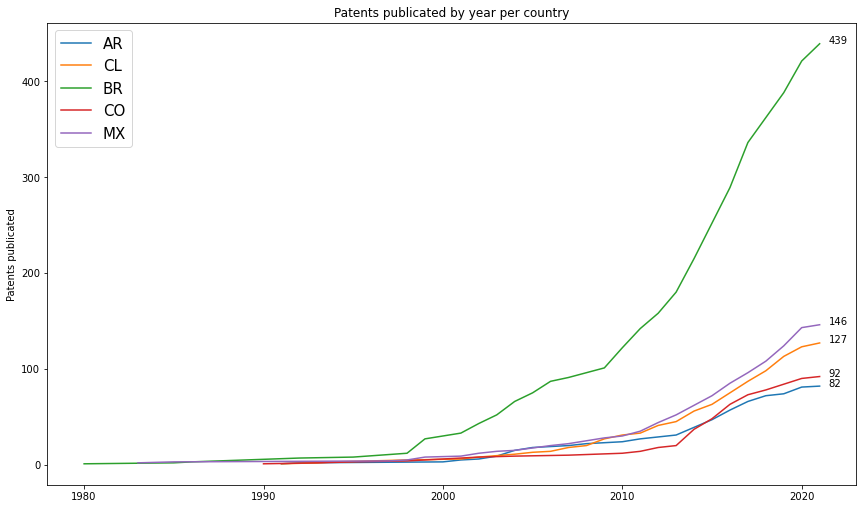

In [173]:
g = g[g.publication_year >= 1980]
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 8.5)
for country in countries:
    publications = g[g.inventor_country == country]['cum_pubs'].values
    years = g[g.inventor_country == country]['publication_year'].values
    ax.plot(years, publications, label=country)

texts = [ax.text(2021+0.5, value, value) for value in g[g['publication_year'] == 2021]['cum_pubs'].values]
plt.legend(prop={'size': 15})
plt.title('Cumulative patents publicated by year')
plt.ylabel('Patents publicated')
plt.show()

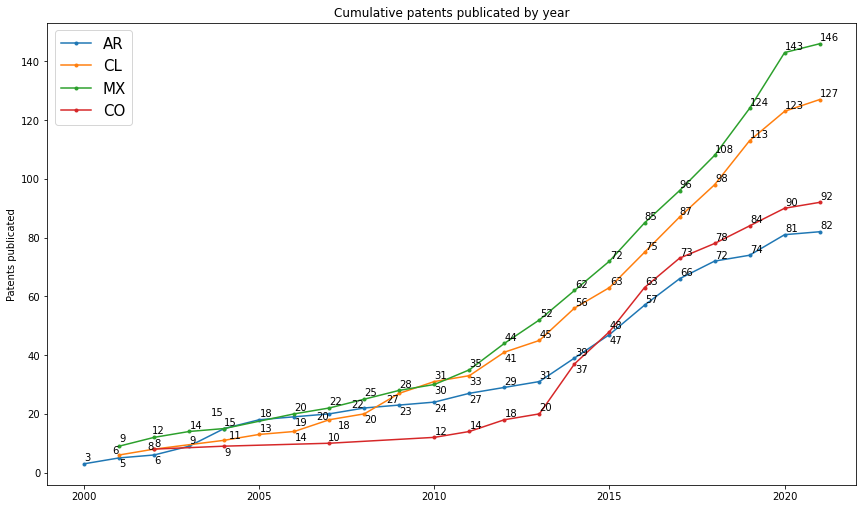

In [197]:
g_2000 = g[(g.publication_year >= 2000) & (g.inventor_country != 'BR')]
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 8.5)
for country in g_2000.inventor_country.unique():
    publications = g_2000[g_2000.inventor_country == country]['cum_pubs'].values
    years = g_2000[g_2000.inventor_country == country]['publication_year'].values
    ax.plot(years, publications, label=country, marker = '.', linestyle = '-')

texts = [ax.text(year, value, value) for value, year in g_2000[['cum_pubs', 'publication_year']].values]
adjust_text(texts)
plt.legend(prop={'size': 15})
plt.title('Cumulative patents publicated by year')
plt.ylabel('Patents publicated')
plt.show()